In [18]:
import h5py as h5
import numpy as np
from mpl_toolkits import mplot3d
import tensorflow as tf
import random
import tqdm
import matplotlib.pyplot as plt

In [3]:
two = h5.File('output_digi_HDF_2Body.h5', 'r')
three = h5.File('output_digi_HDF_3Body.h5', 'r')
print(three["Event_[3]"][:][:])

[( 5.64447136e+01,  126.06894684, 714., 357,  2.61528645, 0)
 ( 5.64447174e+01,  128.97045898, 716., 358,  4.39382962, 0)
 ( 5.39905968e+01,  124.71979523, 716., 358,  9.26055116, 0)
 ( 5.39905968e+01,  121.81829071, 720., 360, 10.90987706, 0)
 ( 5.64447174e+01,  120.4691391 , 720., 360,  5.25915115, 0)
 ( 5.15364799e+01,  117.56763458, 722., 361, 22.28800727, 0)
 ( 5.39905968e+01,  116.21848297, 722., 361, 17.56983314, 0)
 ( 5.15364799e+01,  120.4691391 , 722., 361,  5.51485777, 0)
 ( 5.64447174e+01,  117.56763458, 722., 361,  5.10027719, 0)
 ( 5.39905968e+01,  113.31697845, 724., 362,  1.32808849, 0)
 ( 4.90823631e+01,  116.21848297, 726., 363,  4.98327219, 0)
 ( 5.15364838e+01,  111.96782684, 728., 364, 12.68608755, 0)
 ( 4.90823631e+01,  113.31697845, 728., 364,  9.72655334, 0)
 ( 4.90823593e+01,  107.71717072, 730., 365, 27.64697301, 0)
 ( 5.15364761e+01,  109.06632233, 730., 365,  1.52830276, 0)
 ( 4.90823593e+01,  104.8156662 , 732., 366, 12.77961443, 0)
 ( 4.66282425e+01,  109.

In [4]:
sample_size = 50
len2 = len(list(two.keys()))
len3 = len(list(three.keys()))

In [6]:
file_name = 'AllEvents_size' + str(sample_size) + '.h5'
new = h5.File(file_name, 'a')
for n in tqdm.tqdm(range(len2)):
    name = 'Event_[' + str(n) + ']'
    event2 = two[name]
    event3 = three[name]
    length2 = len(event2)
    length3 = len(event3)
    event_data2 = np.zeros((length2, 6), float)
    event_data3 = np.zeros((length3, 6), float)
    #converting event into an array
    for i,e in enumerate(event2):
        instant = np.array(list(e))
        event_data2[i] = np.array(instant)
    for i,e in enumerate(event3):
        instant = np.array(list(e))
        event_data3[i] = np.array(instant)
    
    new_event2 = np.zeros((sample_size, 6), float)
    new_event3 = np.zeros((sample_size, 6), float)
    new_name2 = name + '.2'
    new_name3 = name + '.3'
    #making new array for normalized event
    if length2 == sample_size:
        new_event2 = event_data2
    else:        #length2 != sample_size:
        if length2 != 0:
            for i in range(sample_size):
                row = random.randint(0, length2 - 1)
                new_event2[i,:5] = event_data2[row,:5]
                if n%2 == 0:
                    new_event2[i,5] = 0
                else:
                    new_event2[i,5] = 1
        else:
            continue
        
    if length3 == sample_size:
        new_event3 = event_data3
    else:        #length3 != sample_size
        if length3 != 0:
            for i in range(sample_size):
                row = random.randint(0, length3 - 1)
                new_event3[i,:5] = event_data3[row,:5]
                if n%2 == 0:
                    new_event3[i,5] = 0
                else:
                    new_event3[i,5] = 2
        else:
            continue
    
    new.create_dataset(new_name2, data = new_event2)
    new.create_dataset(new_name3, data = new_event3)

100%|██████████| 10000/10000 [03:36<00:00, 46.26it/s]


In [7]:
print(len(list(new.keys())))
print(new['Event_[227].3'][:][:])

19890
[[ 107.98118591   11.30121613  922.          461.            2.30067749
     2.        ]
 [ -78.53177643   87.81303406  886.          443.            2.26325518
     2.        ]
 [ 112.88941956   14.20272255  922.          461.            3.0443668
     2.        ]
 [  51.53646851    7.05056143  928.          464.            1.89736237
     2.        ]
 [ -41.71999741   41.05581284  908.          454.            1.70294758
     2.        ]
 [ -39.26588058  -73.71191406  924.          462.            2.48369501
     2.        ]
 [   2.45413303   -1.45075214  934.          467.            1.40553203
     2.        ]
 [ -51.53647614 -103.46651459  922.          461.            1.97524674
     2.        ]
 [  -4.90824747   -2.79990482  934.          467.            9.23456027
     2.        ]
 [ 107.98118591   14.2027216   922.          461.            3.7751697
     2.        ]
 [ -44.17411423   48.20797348  908.          454.            3.96973644
     2.        ]
 [ -17.1788311   

In [8]:
print(new['Event_[227].2'].shape)
print(new['Event_[227].3'].shape)

(50, 6)
(50, 6)


In [10]:
#setting aside a test set from the all events dataset
name = 'AllEvents_size' + str(sample_size)
whole = h5.File(name + '.h5','r')
test = h5.File(name + '_test.h5', 'a')
rest = h5.File(name + '_rest.h5', 'a')
keys = list(whole.keys())
length = len(keys)
test_len = int(0.2*length)
test_set_indices = np.random.choice(range(length), test_len, replace=False)
for i in tqdm.tqdm(range(length)):
    event = whole[keys[i]]
    if np.isin(i, test_set_indices, assume_unique=True):
        test.create_dataset(keys[i], data = event)
    else:
        rest.create_dataset(keys[i], data = event)

100%|██████████| 19890/19890 [00:21<00:00, 933.58it/s]


In [12]:
#splits remaining events data into training and validation sets
name = 'AllEvents_size' + str(sample_size)
whole = h5.File(name + '_rest.h5','r')
train = h5.File(name + '_train.h5', 'a')
val = h5.File(name + '_val.h5', 'a')
keys = list(whole.keys())
length = len(keys)
val_len = int(0.25*length)     #20% of 80%
val_set_indices = np.random.choice(range(length), val_len, replace=False)
for i in tqdm.tqdm(range(length)):
    event = whole[keys[i]]
    if np.isin(i, val_set_indices, assume_unique=True):
        val.create_dataset(keys[i], data = event)
    else:
        train.create_dataset(keys[i], data = event)

100%|██████████| 15912/15912 [00:17<00:00, 933.02it/s]


In [13]:
print(val_len, len(list(val.keys())))
print(length - val_len, len(list(train.keys())))

3978 3978
11934 11934


In [15]:
#run this if you haven't run the cells above
new = h5.File('AllEvents_size50.h5','r')

In [32]:
def get_change(set_name, sample_size, event):
    if str(set_name) == 'two':
        if len(new[str(event)]) > sample_size:
            return 'Downsampled'
        elif len(new[str(event)]) < sample_size:
            return 'Upsampled'
        else:
            return ''
    else:
        if len(new[str(event)]) > sample_size:
            return 'Downsampled'
        elif len(new[str(event)]) < sample_size:
            return 'Upsampled'
        else:
            return ''

In [33]:
new = h5.File(file_name, 'r')

50 vs. 50 points


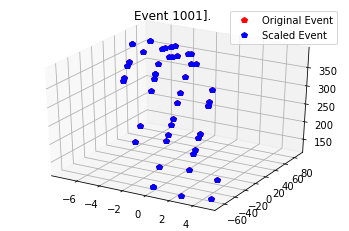

In [34]:
event = 1001
name = 'Event_[' + str(event) + '].2'
new_name = name + '.2'
print(str(len(new[name])) + ' vs. ' + str(sample_size) + ' points')

ax = plt.axes(projection='3d')
#plotting original event
event = new[name]
evt_data = np.zeros((len(event[:]),6))
for i,e in enumerate(event):
    instant = np.array(list(e))
    evt_data[i] = np.array(instant)
x = evt_data[:,0]
y = evt_data[:,1]
z = evt_data[:,2]
ax.plot3D(x,y,z,"rp", label='Original Event')

#plotting normalized event
event = new[name]
evt_data = np.zeros((sample_size,6))
for i,e in enumerate(event):
    instant = np.array(list(e))
    evt_data[i] = np.array(instant)
x = evt_data[:,0]
y = evt_data[:,1]
z = evt_data[:,2]
ax.plot3D(x,y,z,"bp", label='Scaled Event')
plt.title(name[:5] + ' ' + name[7:-1] + ' ' + get_change('new', sample_size, name))
ax.legend()
plt.show()

In [36]:
test = h5.File('AllEvents_size50_test.h5','r')
print(len(list(test.keys())))

3978


In [23]:
print(list(new.keys()))

['Event_[0].2', 'Event_[0].3', 'Event_[1000].2', 'Event_[1000].3', 'Event_[1001].2', 'Event_[1001].3', 'Event_[1002].2', 'Event_[1002].3', 'Event_[1003].2', 'Event_[1003].3', 'Event_[1004].2', 'Event_[1004].3', 'Event_[1005].2', 'Event_[1005].3', 'Event_[1006].2', 'Event_[1006].3', 'Event_[1007].2', 'Event_[1007].3', 'Event_[1008].2', 'Event_[1008].3', 'Event_[1009].2', 'Event_[1009].3', 'Event_[100].2', 'Event_[100].3', 'Event_[1010].2', 'Event_[1010].3', 'Event_[1011].2', 'Event_[1011].3', 'Event_[1012].2', 'Event_[1012].3', 'Event_[1013].2', 'Event_[1013].3', 'Event_[1014].2', 'Event_[1014].3', 'Event_[1015].2', 'Event_[1015].3', 'Event_[1016].2', 'Event_[1016].3', 'Event_[1017].2', 'Event_[1017].3', 'Event_[1018].2', 'Event_[1018].3', 'Event_[1019].2', 'Event_[1019].3', 'Event_[101].2', 'Event_[101].3', 'Event_[1020].2', 'Event_[1020].3', 'Event_[1021].2', 'Event_[1021].3', 'Event_[1022].2', 'Event_[1022].3', 'Event_[1023].2', 'Event_[1023].3', 'Event_[1024].2', 'Event_[1024].3', '